# Base exploration of the data for the Marketing project

In [17]:
! pip install seaborn
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 30.0 MB/s eta 0:00:00


In [12]:
base_path = '/teamspace/studios/this_studio/Marketing_data/'

In [13]:
# list all the files in the directory
import os
files = os.listdir(base_path)
print(files)

['tbl_customers.csv', 'tbl_products.csv', 'tbl_labelled_reviews.csv', 'tbl_orders.csv', 'tbl_addresses.csv', 'tbl_customer_reviews.csv', 'tbl_customer_accounts.csv']


In [14]:
import pandas as pd

for file in files:
    df = pd.read_csv(base_path + file)
    print(f"Columns of {file}:")
    print(df.columns)
    print()

Columns of tbl_customers.csv:
Index(['customer_id', 'address_id', 'birthdate', 'gender', 'job_type',
       'email_provider', 'flag_phone_provided', 'flag_privacy'],
      dtype='object')

Columns of tbl_products.csv:
Index(['product_id', 'product_class'], dtype='object')

Columns of tbl_labelled_reviews.csv:
Index(['labelled_reviews_index', 'review_text', 'sentiment_label'], dtype='object')

Columns of tbl_orders.csv:
Index(['order_id', 'customer_id', 'store_id', 'product_id', 'direction',
       'gross_price', 'price_reduction', 'purchase_datetime'],
      dtype='object')

Columns of tbl_addresses.csv:
Index(['address_id', 'postal_code', 'district', 'region'], dtype='object')

Columns of tbl_customer_reviews.csv:
Index(['review_id', 'customer_id', 'review_text'], dtype='object')

Columns of tbl_customer_accounts.csv:
Index(['customer_id', 'account_id', 'favorite_store', 'loyalty_type',
       'loyatlty_status', 'activation_date'],
      dtype='object')



In [15]:
import pandas as pd

for file in files:
    df = pd.read_csv(base_path + file)
    df.head(3)
    print(f"Head of {file}:")
    print(df.head(3))
    print()

Head of tbl_customers.csv:
   customer_id  address_id   birthdate gender job_type email_provider  \
0       891057      863914  2001-10-22      F      NaN       yahoo.it   
1       655484      639856  2001-04-30      M      NaN       yahoo.it   
2       514958      494806  2001-01-01      M      NaN      libero.it   

   flag_phone_provided  flag_privacy  
0                  1.0          True  
1                  1.0         False  
2                  1.0          True  

Head of tbl_products.csv:
   product_id  product_class
0    35996051              9
1    35980371             14
2    31276196              4

Head of tbl_labelled_reviews.csv:
   labelled_reviews_index                                        review_text  \
0                       0  I'm no bitters expert but I bought it as a gif...   
1                       1  these are probably great in the right drinks, ...   
2                       2  I sent these to my dad for his bday and he sai...   

  sentiment_label  
0    


Data Quality Check for Customer Data
Missing values:
customer_id                 0
address_id                  0
birthdate                   0
gender                      0
job_type               217368
email_provider           3114
flag_phone_provided     17976
flag_privacy                0
postal_code              2160
district                20010
region                   8336
account_id                  0
favorite_store              0
loyalty_type                0
loyatlty_status             0
activation_date             0
dtype: int64

Duplicate rows: 83667

Data types:
customer_id              int64
address_id               int64
birthdate               object
gender                  object
job_type                object
email_provider          object
flag_phone_provided    float64
flag_privacy              bool
postal_code            float64
district                object
region                  object
account_id               int64
favorite_store           int64
loyalty_type  

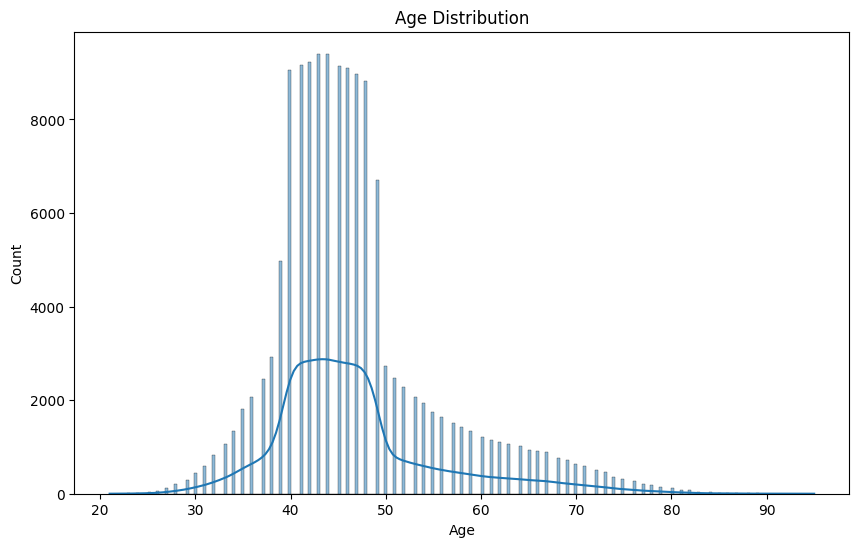

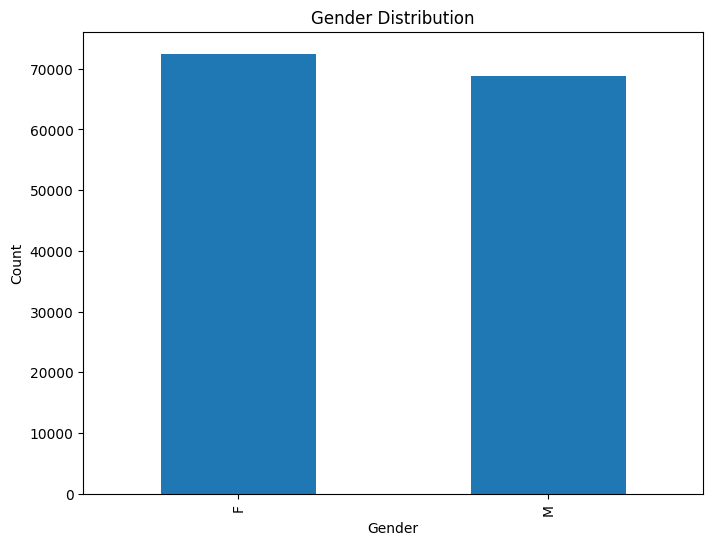

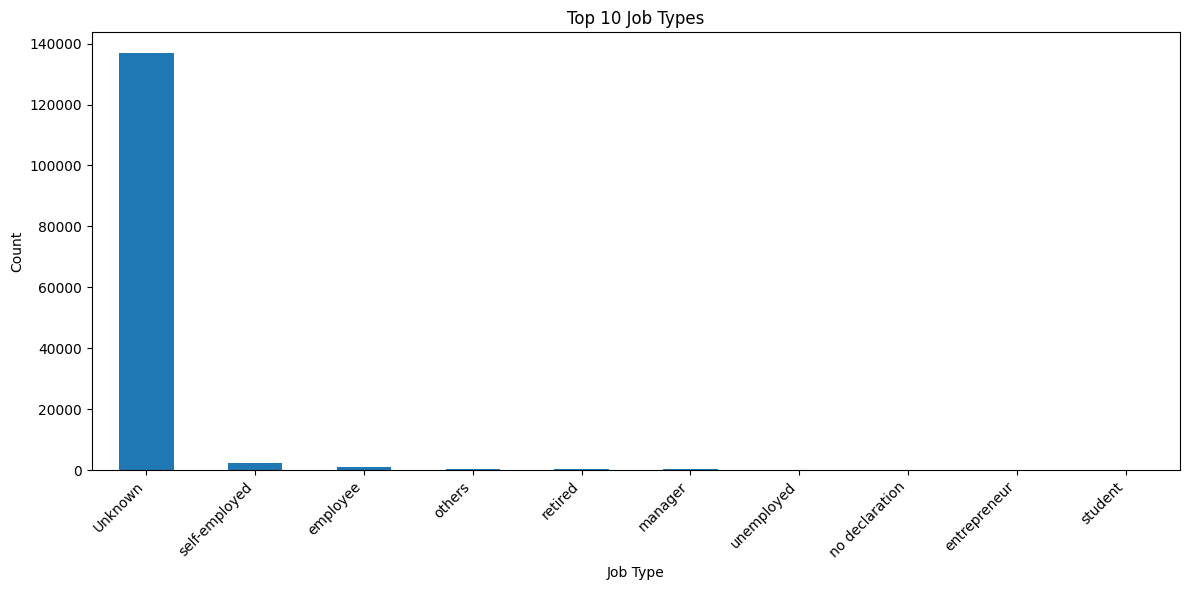


Order Patterns Analysis


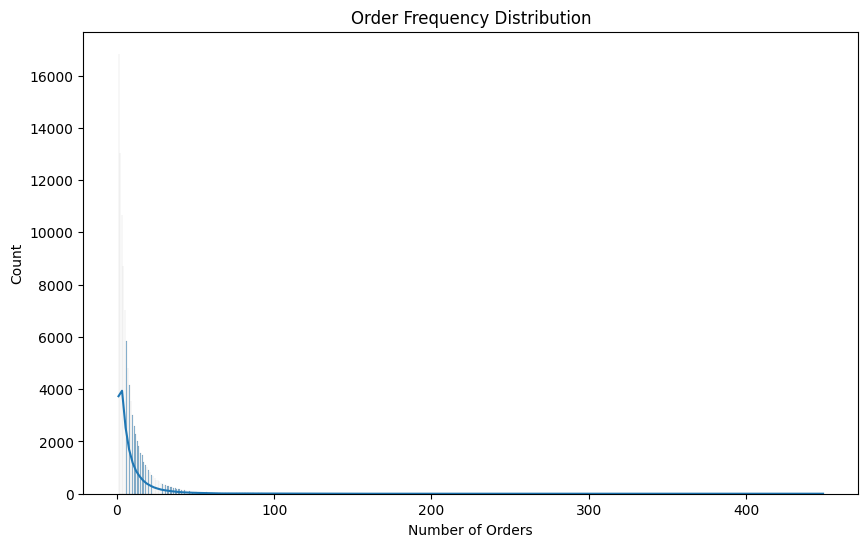

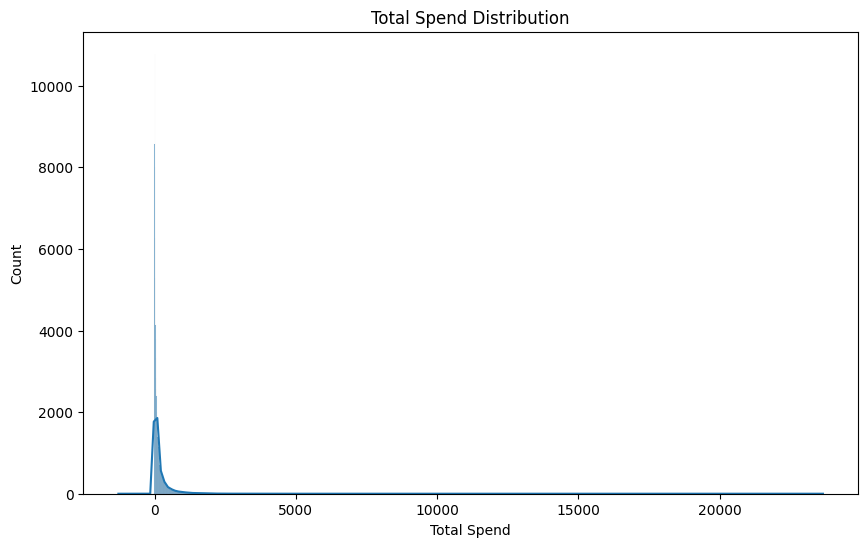

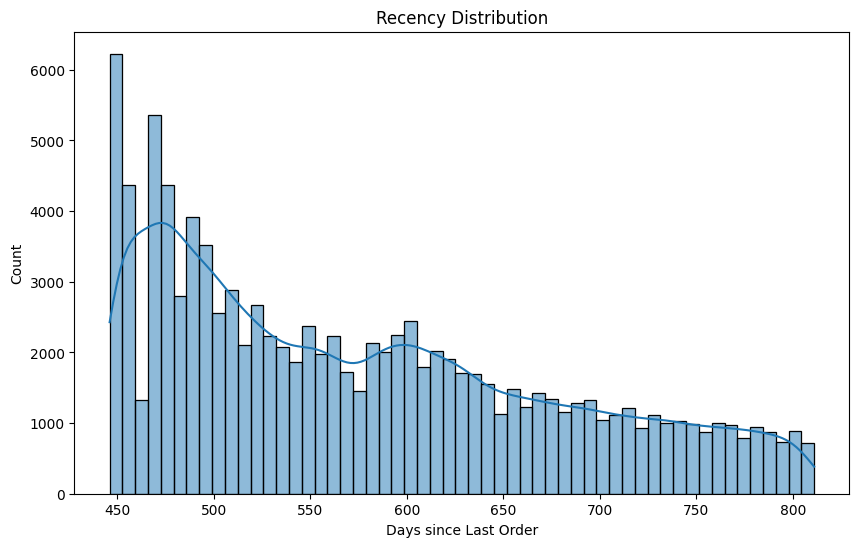


Product Popularity Analysis


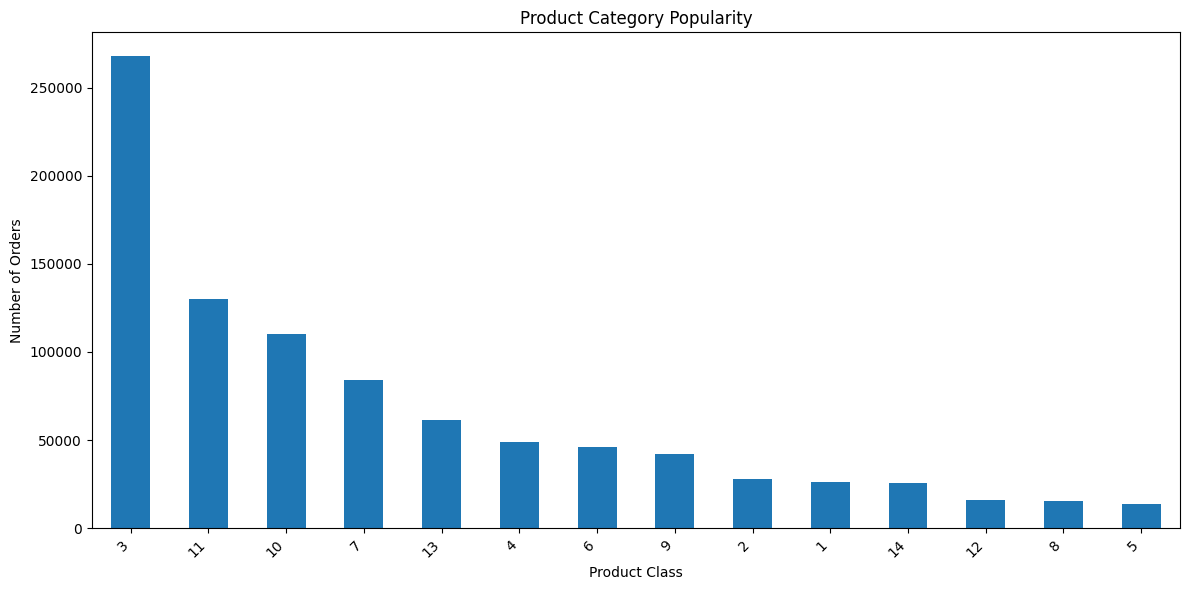


Customer Reviews Analysis


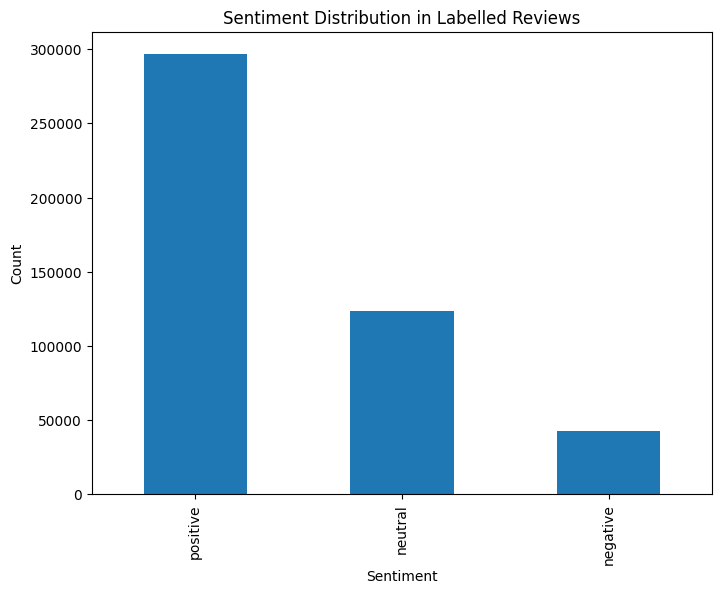

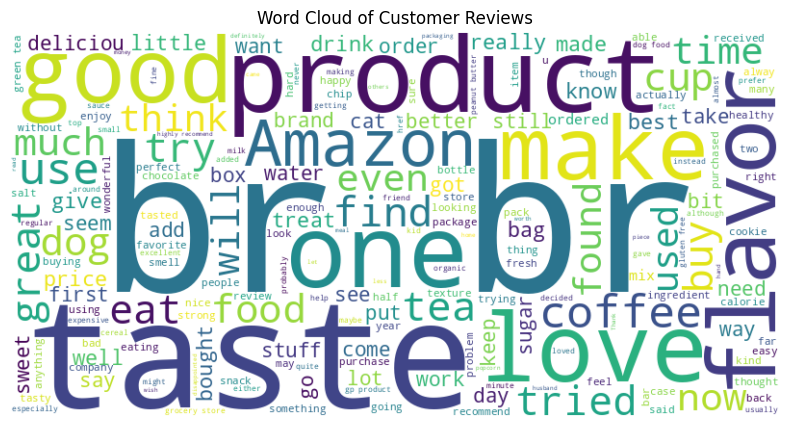

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set the random seed for reproducibility
np.random.seed(42)

# 1.1 Load and merge datasets
def load_and_merge_data(base_path):
    # Load datasets
    customers = pd.read_csv(f"{base_path}tbl_customers.csv")
    addresses = pd.read_csv(f"{base_path}tbl_addresses.csv")
    accounts = pd.read_csv(f"{base_path}tbl_customer_accounts.csv")
    orders = pd.read_csv(f"{base_path}tbl_orders.csv")
    products = pd.read_csv(f"{base_path}tbl_products.csv")
    customer_reviews = pd.read_csv(f"{base_path}tbl_customer_reviews.csv")
    labelled_reviews = pd.read_csv(f"{base_path}tbl_labelled_reviews.csv")

    # Merge customers, addresses, and accounts
    customer_data = customers.merge(addresses, on='address_id', how='left')
    customer_data = customer_data.merge(accounts, on='customer_id', how='left')

    # Merge orders and products
    order_data = orders.merge(products, on='product_id', how='left')

    return customer_data, order_data, customer_reviews, labelled_reviews

# 1.2 Perform data quality checks
def check_data_quality(df, name):
    print(f"\nData Quality Check for {name}")
    print("Missing values:")
    print(df.isnull().sum())
    print("\nDuplicate rows:", df.duplicated().sum())
    print("\nData types:")
    print(df.dtypes)
    print("\nBasic statistics:")
    print(df.describe())

def handle_data_issues(df):
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    
    # Handle missing values (this is a simple imputation, you might want to use more sophisticated methods)
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column].fillna('Unknown', inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)
    
    return df

# 1.3 Conduct exploratory data analysis (EDA)  
def analyze_customer_demographics(customer_data):
    print("\nCustomer Demographics Analysis")
    
    # Handle missing values
    customer_data['birthdate'] = pd.to_datetime(customer_data['birthdate'], errors='coerce')
    customer_data['gender'] = customer_data['gender'].fillna('Unknown')
    customer_data['job_type'] = customer_data['job_type'].fillna('Unknown')

    # Drop rows with NaT birthdate
    customer_data = customer_data.dropna(subset=['birthdate'])
    
    # Age distribution
    current_date = pd.Timestamp.now()
    # customer_data['age'] = (current_date - customer_data['birthdate']).astype('<m8[Y]').astype(int)
    customer_data['age'] = pd.to_numeric((current_date - customer_data['birthdate']).dt.days, downcast='integer').div(365).round().astype(int)

    
    plt.figure(figsize=(10, 6))
    sns.histplot(customer_data['age'], kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.show()

    # Gender distribution
    gender_counts = customer_data['gender'].value_counts()
    plt.figure(figsize=(8, 6))
    gender_counts.plot(kind='bar')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

    # Job type distribution (top 10)
    job_counts = customer_data['job_type'].value_counts().nlargest(10)
    plt.figure(figsize=(12, 6))
    job_counts.plot(kind='bar')
    plt.title('Top 10 Job Types')
    plt.xlabel('Job Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def analyze_order_patterns(order_data):
    print("\nOrder Patterns Analysis")
    
    # Convert purchase_datetime to datetime
    order_data['purchase_datetime'] = pd.to_datetime(order_data['purchase_datetime'])
    
    # Frequency: number of orders per customer
    order_frequency = order_data.groupby('customer_id').size().reset_index(name='order_count')
    plt.figure(figsize=(10, 6))
    sns.histplot(order_frequency['order_count'], kde=True)
    plt.title('Order Frequency Distribution')
    plt.xlabel('Number of Orders')
    plt.show()

    # Monetary Value: total spend per customer
    monetary_value = order_data.groupby('customer_id')['gross_price'].sum().reset_index(name='total_spend')
    plt.figure(figsize=(10, 6))
    sns.histplot(monetary_value['total_spend'], kde=True)
    plt.title('Total Spend Distribution')
    plt.xlabel('Total Spend')
    plt.show()

    # Recency: days since last order
    last_order_date = order_data.groupby('customer_id')['purchase_datetime'].max().reset_index(name='last_order_date')
    last_order_date['recency'] = (pd.Timestamp.now() - last_order_date['last_order_date']).dt.days
    plt.figure(figsize=(10, 6))
    sns.histplot(last_order_date['recency'], kde=True)
    plt.title('Recency Distribution')
    plt.xlabel('Days since Last Order')
    plt.show()

def analyze_product_popularity(order_data):
    print("\nProduct Popularity Analysis")
    
    # Product category popularity
    category_popularity = order_data.groupby('product_class').size().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    category_popularity.plot(kind='bar')
    plt.title('Product Category Popularity')
    plt.xlabel('Product Class')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def analyze_customer_reviews(customer_reviews, labelled_reviews):
    print("\nCustomer Reviews Analysis")
    
    # Sentiment distribution in labelled reviews
    sentiment_counts = labelled_reviews['sentiment_label'].value_counts()
    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar')
    plt.title('Sentiment Distribution in Labelled Reviews')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    # Word cloud of review text (you might need to install wordcloud: pip install wordcloud)
    from wordcloud import WordCloud
    all_reviews = ' '.join(customer_reviews['review_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Customer Reviews')
    plt.show()

# Main execution
if __name__ == "__main__":
    base_path = '/teamspace/studios/this_studio/Marketing_data/'
    
    # 1.1 Load and merge datasets
    customer_data, order_data, customer_reviews, labelled_reviews = load_and_merge_data(base_path)
    
    # 1.2 Perform data quality checks and handle issues
    for df, name in zip([customer_data, order_data, customer_reviews, labelled_reviews],
                        ['Customer Data', 'Order Data', 'Customer Reviews', 'Labelled Reviews']):
        check_data_quality(df, name)
        df = handle_data_issues(df)
    
    # 1.3 Conduct exploratory data analysis (EDA)
    analyze_customer_demographics(customer_data)
    analyze_order_patterns(order_data)
    analyze_product_popularity(order_data)
    analyze_customer_reviews(customer_reviews, labelled_reviews)